In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tqdm import tnrange, tqdm_notebook

In [8]:
n_run = 2000
n_step = 1000 

In [22]:
def average_reward_bandit(epsilon, n_run, n_step):
    total_Q_plot = np.zeros((n_run, n_step))
    total_optimal_percent_plot = np.zeros((n_run, n_step))
    for run in tnrange(n_run, desc='total runs'):
        Q = np.zeros((10))
        N = np.zeros((10))

        mu, sigma = 0, 1
        q_optimal = np.random.normal(mu, sigma, 10)

        Q_plot = []
        Reward_sum = 0
        
        optimal_reward_plot = []
        
        for i in range(n_step):
            p = np.random.uniform(0, 1)
            max_val = np.max(Q)
            max_pos = [i for i, value in enumerate(Q) if value == max_val]
            if p > (1 - epsilon):
                action = np.random.choice(max_pos)
            else:
                action = np.random.randint(len(Q))

            reward = np.random.normal(q_optimal[action], 1, 1)[0]
           
            Reward_sum += reward
            N[action] += 1
            Q[action] += 1/N[action]*(reward - Q[action])
            Q_plot.append(Reward_sum/(i+1))
            
            reward_pool = np.random.normal(q_optimal, 1)
            optimal_reward = max(reward_pool)
            minimal_reward = min(reward_pool)
            optimal_percent = (reward - minimal_reward) / (optimal_reward - minimal_reward)
            optimal_reward_plot.append(optimal_percent)
            
        total_Q_plot[run, :] = Q_plot 
        total_optimal_percent_plot[run, :] = optimal_reward_plot
    average_reward = np.mean(total_Q_plot, axis=0) 
    average_optimal_percent = np.mean(total_optimal_percent_plot, axis=0)
    return average_reward, average_optimal_percent

In [23]:
average_reward_greedy, average_optimal_greedy = average_reward_bandit(epsilon=0, n_run=n_run, n_step=n_step)

In [24]:
average_reward_e_01, average_optimal_e_01 = average_reward_bandit(epsilon=0.1, n_run=n_run, n_step=n_step)

In [25]:
average_reward_e_001, average_optimal_e_001 = average_reward_bandit(epsilon=0.01, n_run=n_run, n_step=n_step)

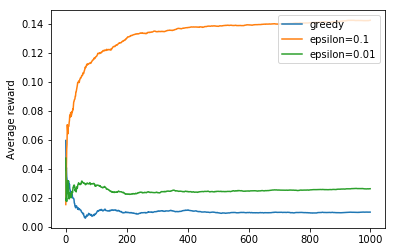

In [26]:
plt.plot(average_reward_greedy)
plt.plot(average_reward_e_01)
plt.plot(average_reward_e_001)
plt.legend(['greedy', 'epsilon=0.1', 'epsilon=0.01'], loc='upper right')
plt.ylabel('Average reward')
plt.show()

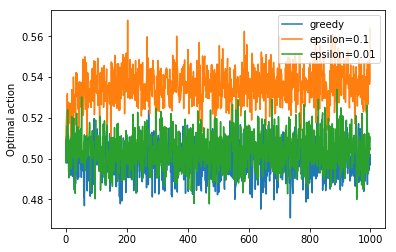

In [27]:
plt.plot(average_optimal_greedy)
plt.plot(average_optimal_e_01)
plt.plot(average_optimal_e_001)
plt.legend(['greedy', 'epsilon=0.1', 'epsilon=0.01'], loc='upper right')
plt.ylabel('Optimal action')
plt.show()